In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Galaxy Demographics in MBII

## load catalog

In [2]:
from intrinsic_alignments.data.MB2_subfind_cat_utils import MBII_galaxy_catalog

catalog = MBII_galaxy_catalog(0.06)

ModuleNotFoundError: No module named 'intrinsic_alignments.data.MB2_subfind_cat_utils'

# centrals/satellites

In [3]:
print("number of galaxies: ", len(catalog.galaxy_table))

# check centrals and satellite

centrals = (catalog.galaxy_table['central']==1)
satellites = (catalog.galaxy_table['central']==0)

print("satellite fraction: ", np.sum(satellites)/len(catalog.galaxy_table))

number of galaxies:  4633801
satellite fraction:  0.25415290816329833


## Cosmic Web

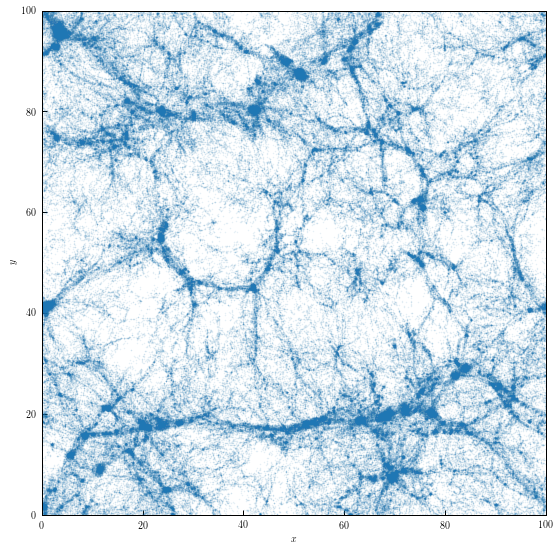

In [4]:
mask = catalog.galaxy_table['z']<10

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(catalog.galaxy_table['x'][mask], catalog.galaxy_table['y'][mask], '.', ms=1, alpha=0.1)
plt.xlim([0,catalog.Lbox])
plt.ylim([0,catalog.Lbox])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

## Stellar Mass Function

In [5]:
def stellar_mass_func(mock, Lbox = 100.0, bin_center='half_way'):
    """
    caclulate stellar mass function
    
    Parameters
    ----------
    mock : astropy.table object
    
    L_box : float
    
    bin_center : string
        how to calulcat the center of the mass bin
    """
    
    #define stellar mass bins
    log_dm = 0.1
    bins = np.arange(7.5,13.0,log_dm)
    bins = 10.0**bins
    
    if bin_center=='half_way':
        bin_centers = (bins[:-1]+bins[1:])/2.0
    elif bin_center=='median':
        bin_centers = binned_statistic(mock['m_star'],
                                       mock['m_star'],
                                       statistic='median', bins=bins)
    
    #calculate number density
    counts = np.histogram(mock['m_star'],bins=bins)[0]
    dndm = counts/(Lbox**3)/log_dm

    return dndm, bin_centers, bins

In [6]:
phi, m, bins = stellar_mass_func(catalog.galaxy_table)

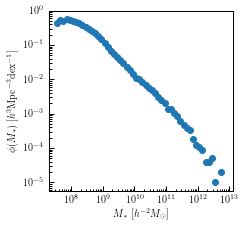

In [7]:
plt.figure(figsize=(3.3,3.3))
plt.plot(m, phi, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M_*~[h^{-2}M_{\odot}]$')
plt.ylabel(r'$\phi(M_{*})~[h^{3}{\rm Mpc}^{-3}{\rm dex}^{-1}]$')
plt.show()

## SMHM

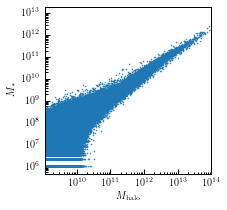

In [8]:
fig = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(catalog.galaxy_table['m_dm'][centrals], catalog.galaxy_table['m_star'][centrals], '.', ms=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim([catalog.dm_particle_mass*100, 10**14])
plt.xlabel(r'$M_{\rm halo}$')
plt.ylabel(r'$M_{*}$')
plt.show()

## Galaxy Bimodality

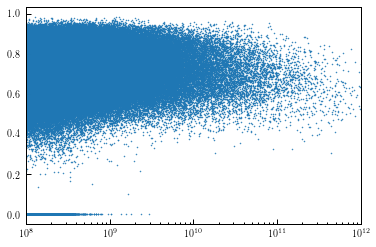

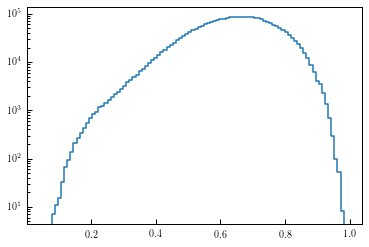

In [9]:
plt.figure()
plt.plot(catalog.galaxy_table['m_star'], catalog.galaxy_table['shapesDM.s3d'], '.', ms=1, alpha=1)
plt.xscale('log')
plt.xlim([10**8,10**12])
plt.show()

bins = np.linspace(0.05,1,100)
counts = np.histogram(catalog.galaxy_table['shapesDM.s3d'], bins=bins)[0]

plt.figure()
plt.step(bins[:-1], counts)
plt.yscale('log')
plt.show()

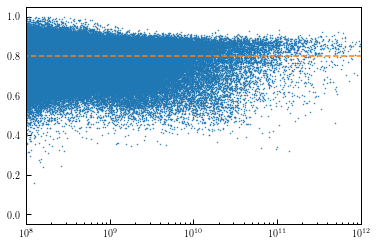

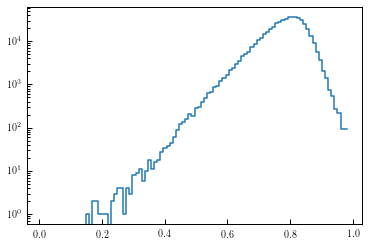

In [10]:
plt.figure()
plt.plot(catalog.galaxy_table['m_star'], catalog.galaxy_table['b_to_t'], '.', ms=1, alpha=1)
plt.plot([10,10**13],[0.8,0.8], '--')
plt.xscale('log')
plt.xlim([10**8,10**12])
plt.show()

bins = np.linspace(0.01,0.99,100)
counts = np.histogram(catalog.galaxy_table['b_to_t'], bins=bins)[0]

plt.figure()
plt.step(bins[:-1], counts)
plt.yscale('log')
plt.show()

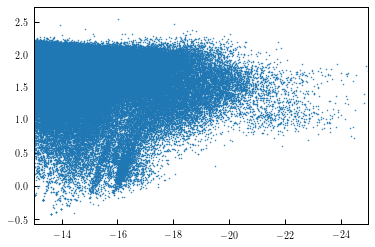

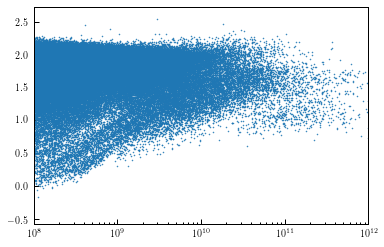

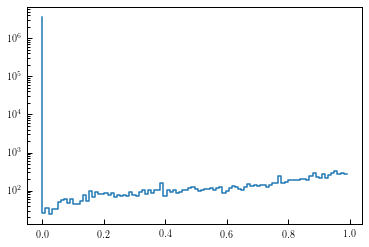

In [12]:
c = catalog.galaxy_table['SDSS_u'] - catalog.galaxy_table['SDSS_r']

plt.figure()
plt.plot(catalog.galaxy_table['SDSS_g'], c, '.', ms=1, alpha=1)
plt.xlim([-13,-25])
plt.show()

plt.figure()
plt.plot(catalog.galaxy_table['m_star'], c, '.', ms=1, alpha=1)
plt.xscale('log')
plt.xlim([10**8,10**12])
plt.show()

bins = np.linspace(0.0,1,100)
counts = np.histogram(c, bins=bins)[0]

plt.figure()
plt.step(bins[:-1], counts)
plt.yscale('log')
plt.show()

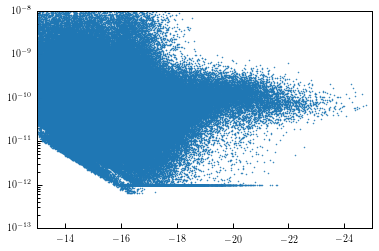

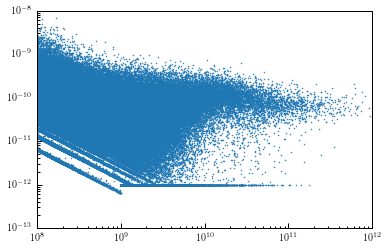

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


ValueError: range parameter must be finite.

In [69]:
c = catalog.galaxy_table['ssfr']

plt.figure()
plt.plot(catalog.galaxy_table['SDSS_g'], c, '.', ms=1, alpha=1)
plt.xlim([-13,-25])
plt.ylim([10**(-13),10**(-8)])
plt.yscale('log')
plt.show()

plt.figure()
plt.plot(catalog.galaxy_table['m_star'], c, '.', ms=1, alpha=1)
plt.xscale('log')
plt.xlim([10**8,10**12])
plt.ylim([10**(-13),10**(-8)])
plt.yscale('log')
plt.show()

bins = np.linspace(-8,-13,100)[::-1]
mask = (c<10**(-12)) & (catalog.galaxy_table['m_star']>10**9)
c[mask] = 10**(-12)
counts = np.histogram(np.log10(c), bins=bins)[0]

plt.figure()
plt.step(bins[:-1], counts)
plt.yscale('log')
plt.show()